# Predict Video Game Sales
Predict video game sales based on review scores, genre & platform.

## FIELDS

- **Variable Name**	Description	Sample Data
- **Name**	Title of video games	Super Mario Bros.; Wii Sports; ...
- **Platform**	The platform of video games released	3DO; 3DS; ...
- **Year_of_Release**	Year of video games released	1980 ; 2020; ...
- **Genre**	Genre of video games	Action; Adventure; ...
- **Publisher**	Publisher of video games	Nintendo; Activision; ...
- **NA_Sales**	Video game sales in North America (in millions)	41.36; 29.08; ...
- **EU_Sales**	Video game sales in Europe (in millions)	28.96; 3.58; ...
- **JP_Sales**	Video game sales in Japan (in millions)	3.77; 6.81; ...
- **Other_Sales**	Video game sales in other countries (in millions)	8.45; 0.77; ...
- **Global_Sales**	Total of worldwide sales	82.53; 40.24; ...
- **Critic_Score**	Score given by the media	76; 82; ...
- **Critic_Count**	Number of critics given by media	51; 73; ...
- **User_Score**	Score given by the video games user	8; 8.3; ...
- **User_Count**	Number of critics given by the user	322; 709; ...
- **Developer**	Video games developer	Nintendo; Ubisoft; ...
- **Rating**	Rating of video games based on ESRB ratings	AO; E10+; ...



In [98]:
# Packages
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [99]:
csv_path = "datasets/Video_Games_Sales_as_at_22_Dec_2016.csv" 
df = pd.read_csv(f"../{csv_path}")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [101]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [102]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

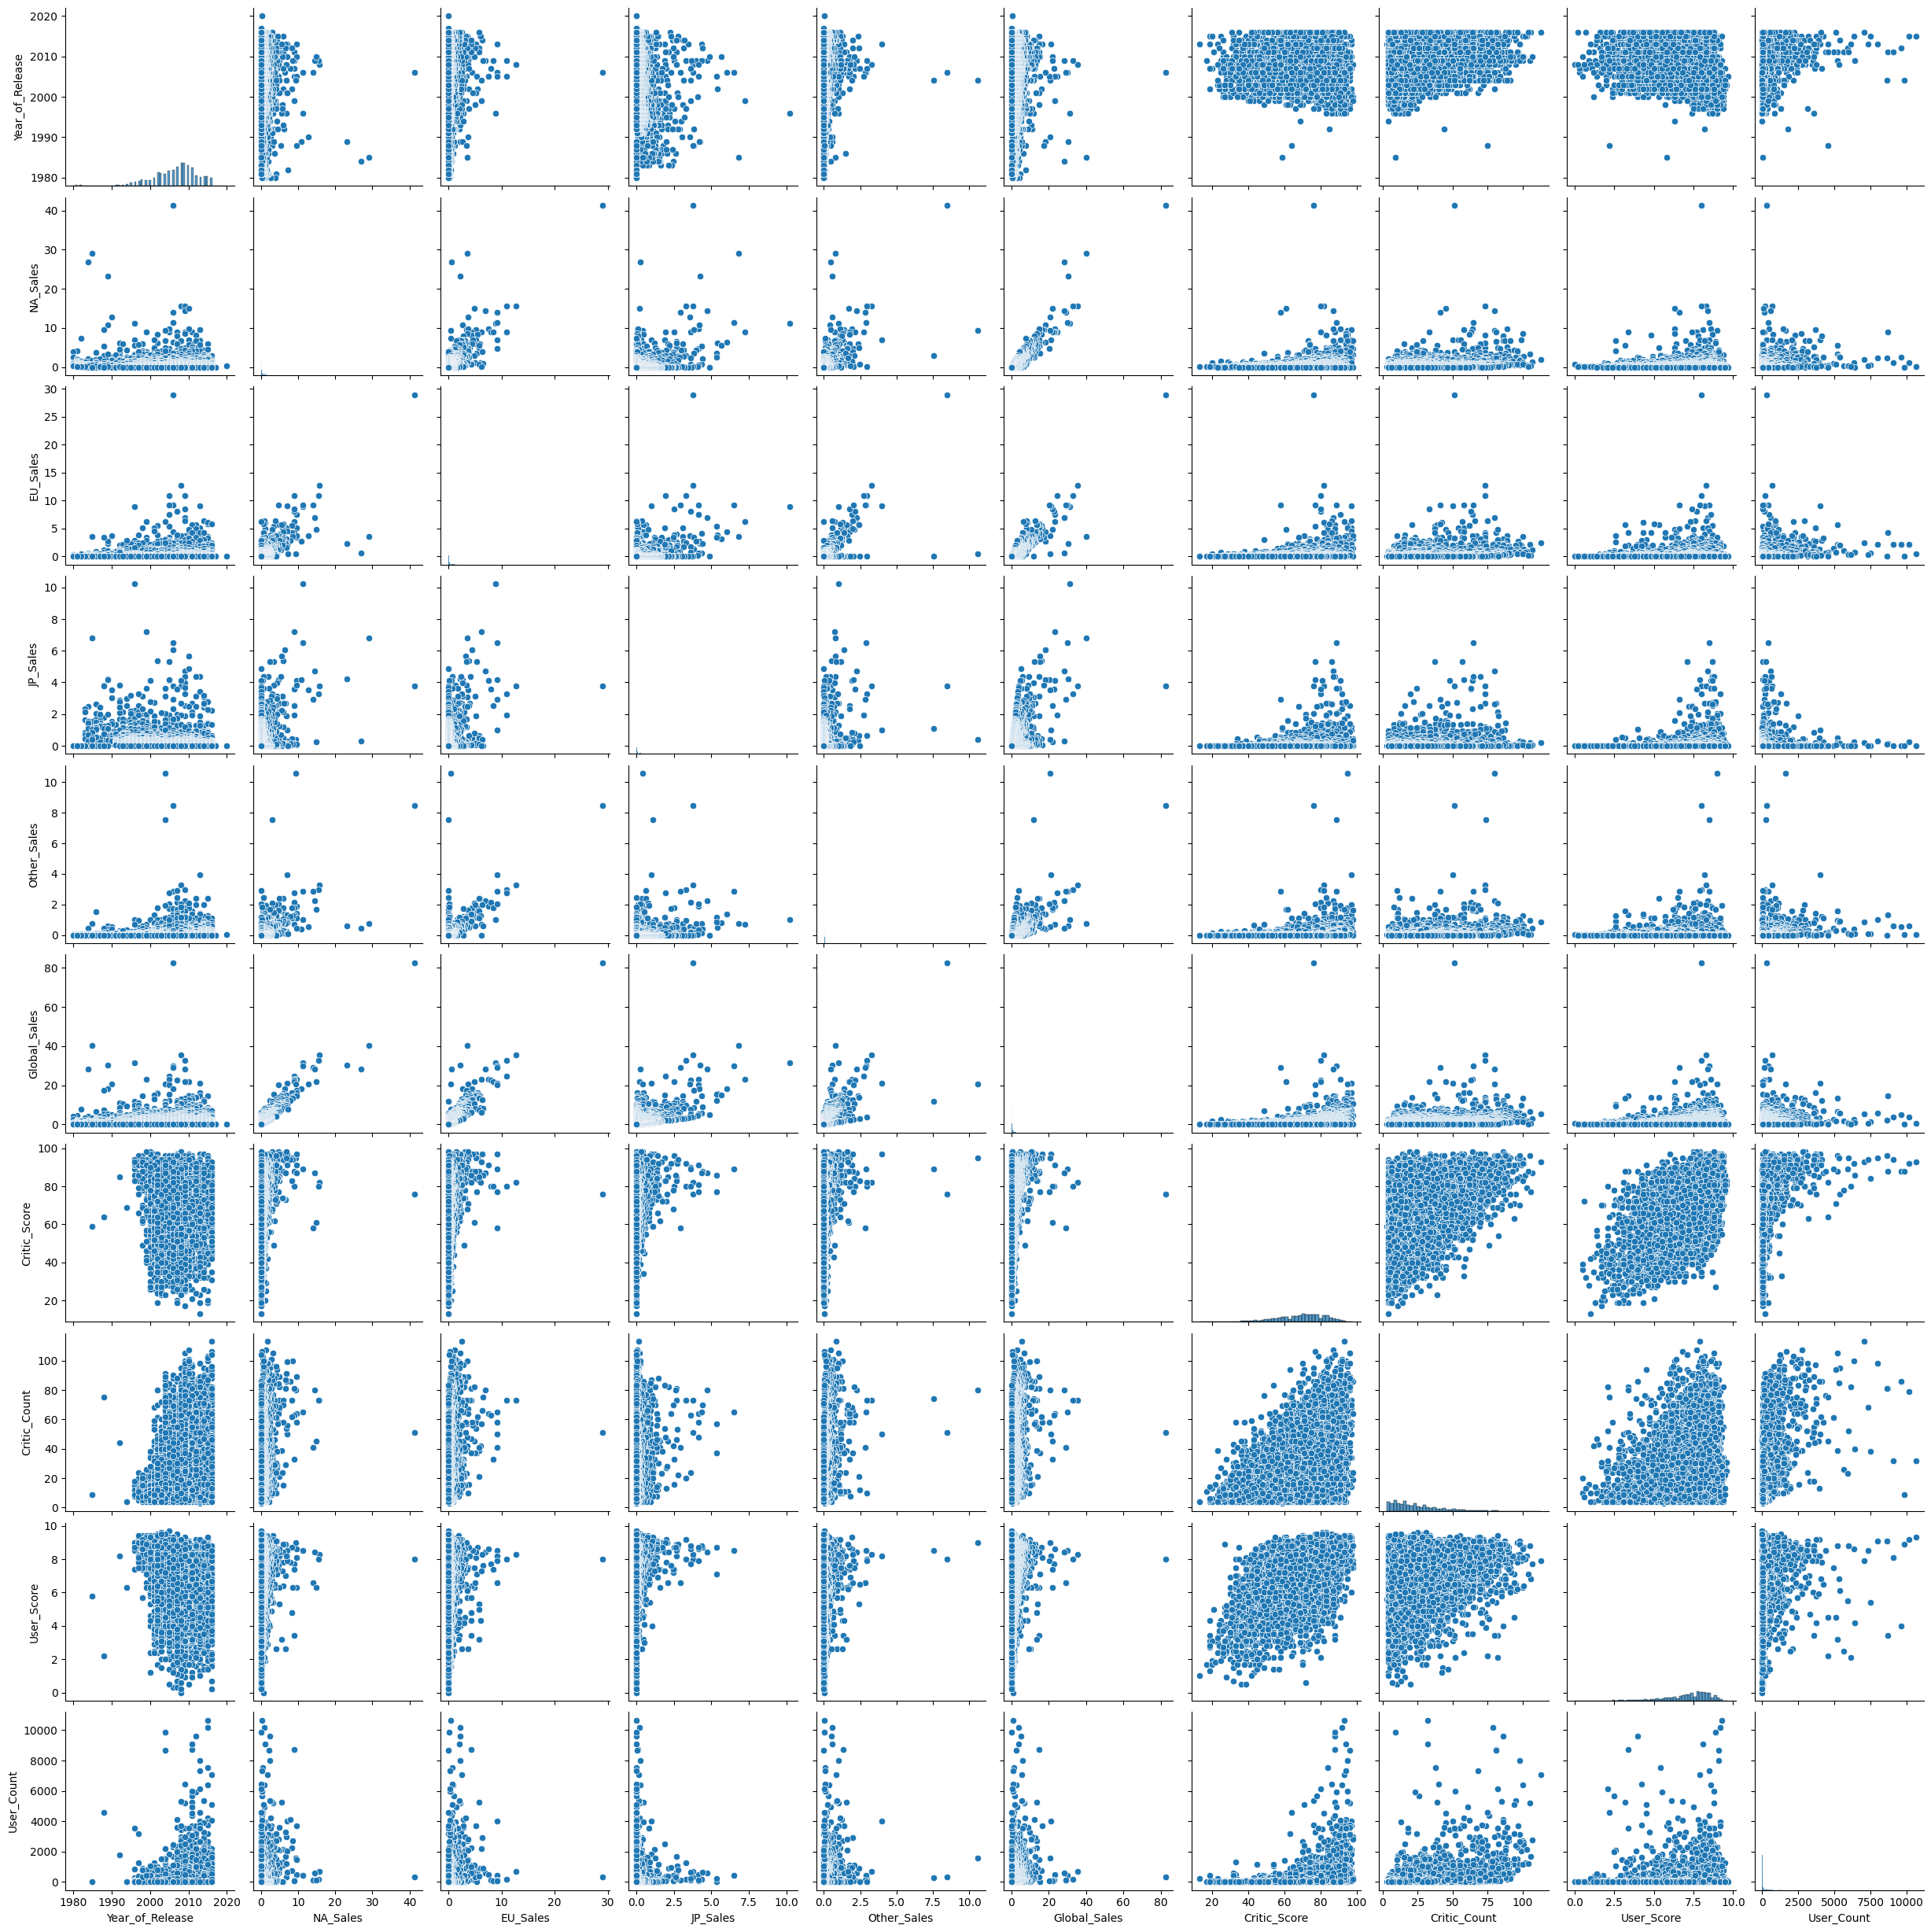

In [103]:
sns.pairplot(df)

/var/folders/9g/mqzwzmzx4l18jxtqyfpcyydw0000gn/T/ipykernel_17612/2294359549.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["EU_Sales"], ax=ax)


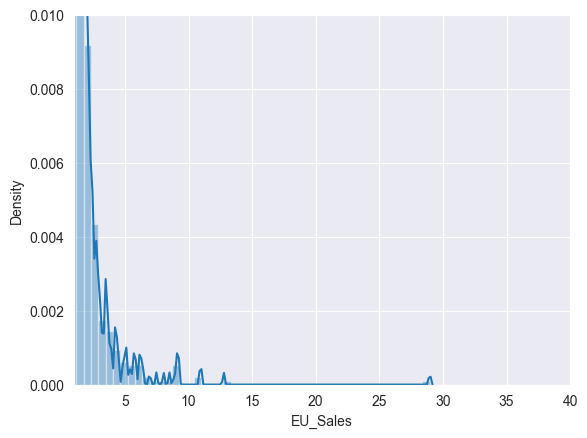

In [219]:
fig, ax = plt.subplots()
sns.distplot(df["EU_Sales"], ax=ax)
ax.set_xlim(1, 40)
ax.set_ylim(0, 0.01)
plt.show()

In [220]:
df.corr(numeric_only=True)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.267851,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.086200,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.055337,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.057119,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.088139,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
User_Score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


<Axes: >

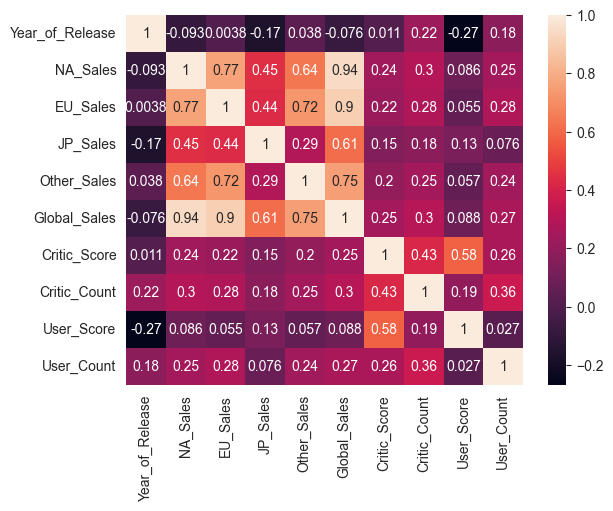

In [221]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [222]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [223]:
X = df[[
    "Year_of_Release",
    # "NA_Sales", toggle these
    # "EU_Sales",
    # "JP_Sales", toggle these  
    # "Other_Sales",
    # "Global_Sales", 
    "Critic_Score",
    "Critic_Count",
    "User_Score", 
    "User_Count",
]]
y = df["EU_Sales"]
X = X.apply(pd.to_numeric, errors="coerce")
y = y.apply(pd.to_numeric, errors="coerce")
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    # random_state=101,
)

In [225]:
lm = LinearRegression()

In [226]:
lm.fit(X_train, y_train)

LinearRegression()

In [227]:
lm.coef_

array([ 1.79864011e-05, -7.86846325e-04,  6.52430203e-03, -6.43451398e-04,
        2.69756179e-04])

In [228]:
X_train.columns

Index(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count'],
      dtype='object')

In [229]:
cdf = pd.DataFrame(
    lm.coef_,
    X.columns,
    columns=["Coeff (EU Price Increase)"],
)
cdf

,Coeff (EU Price Increase)
Year_of_Release,0.000018
Critic_Score,-0.000787
Critic_Count,0.006524
User_Score,-0.000643
User_Count,0.000270


In [235]:
"""
Single input variable prediction version
"""
single_dict = {
    "Year_of_Release": 2025, 
    "Critic_Score": 78.0, 
    "Critic_Count": 78.0 , 
    "User_Score": 81.0,
    "User_Count": 96 + 325,
}
single_input_df = pd.DataFrame([single_dict])

prediction = lm.predict(single_input_df)
prediction


array([0.58196036])

In [231]:
predictions = lm.predict(X_test)
predictions

array([0.38388352, 0.07246943, 0.24201915, ..., 0.05676794, 0.07268526,
       0.07268526])

In [232]:
y_test # contains correct eu sales

1276     0.37
15374    0.00
14197    0.03
5394     0.02
1661     0.17
         ... 
2624     0.30
12173    0.00
13968    0.01
9359     0.00
5168     0.00
Name: EU_Sales, Length: 6688, dtype: float64

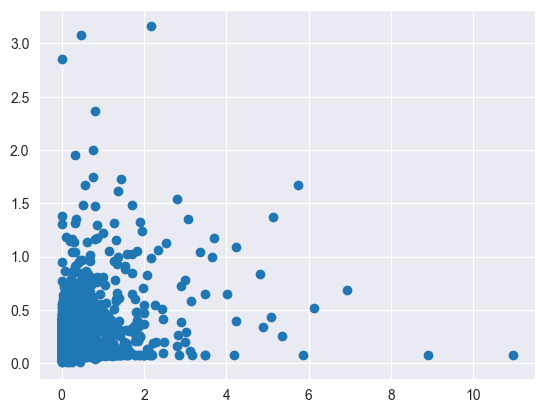

In [233]:
plt.scatter(y_test, predictions)

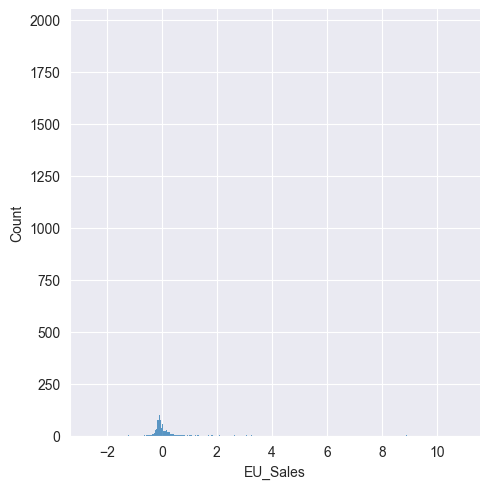

In [215]:
sns.displot((y_test-predictions))

In [216]:
# Metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(0.4446707461496361)